In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
# ✅ Step 1: Import necessary libraries
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score


In [7]:
# ✅ Step 2: Upload your CSV or TSV file
uploaded = "/content/drive/My Drive/spam.csv"

In [8]:
# ✅ Step 2: Upload your CSV or TSV file
uploaded = "/content/drive/My Drive/spam.csv"

# %%
# ✅ Step 3: Load the uploaded file (CSV or TSV)
# filename = list(uploaded.keys())[0] # Remove this line

filename = uploaded # Use the uploaded string directly as the filename

# If the file is TSV use '\t', else treat it as CSV
if filename.endswith('.tsv'):
    df = pd.read_csv(filename, sep='\t', names=['label', 'message'])
else:
    # Specify the encoding as 'latin1' or 'ISO-8859-1'
    df = pd.read_csv(filename, encoding='latin1')
    #If 'latin1' does not work, try 'ISO-8859-1', 'cp1252', or other common encodings

# Preview the first few rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
# ✅ Step 4: Clean and label encode
# Replace 'v1', 'v2' with actual column names from your CSV
# Get the actual column names
print(df.columns)

# Now, use the correct column names to select and rename them
df = df[[df.columns[0], df.columns[1]]]  # Assuming label and message are the first two columns
df.rename(columns={df.columns[0]: 'label', df.columns[1]: 'message'}, inplace=True)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Check distribution
df['label'].value_counts()


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


<ipython-input-9-4eadebb025d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={df.columns[0]: 'label', df.columns[1]: 'message'}, inplace=True)
<ipython-input-9-4eadebb025d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


,count
label,
ham,4825
spam,747


In [10]:
# ✅ Step 5: Split and vectorize
X = df['message']
y = df['label_num']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [11]:
# ✅ Step 6: Define a function to train and evaluate models
def train_evaluate_model(model, name):
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    print(f"\n🔍 {name} Classification Report:")
    print(classification_report(y_test, preds, target_names=["Ham", "Spam"]))
    print(f"✅ Accuracy: {accuracy_score(y_test, preds):.4f}")


In [12]:
# ✅ Step 7: Train Naive Bayes
train_evaluate_model(MultinomialNB(), "Naive Bayes")



🔍 Naive Bayes Classification Report:
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

✅ Accuracy: 0.9668


In [13]:
# ✅ Step 8: Train Logistic Regression
train_evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")



🔍 Logistic Regression Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

✅ Accuracy: 0.9525


In [14]:
# ✅ Step 9: Train Support Vector Machine
train_evaluate_model(LinearSVC(), "Support Vector Machine")



🔍 Support Vector Machine Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       965
        Spam       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

✅ Accuracy: 0.9785


<ipython-input-15-2ac4708c5033>:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


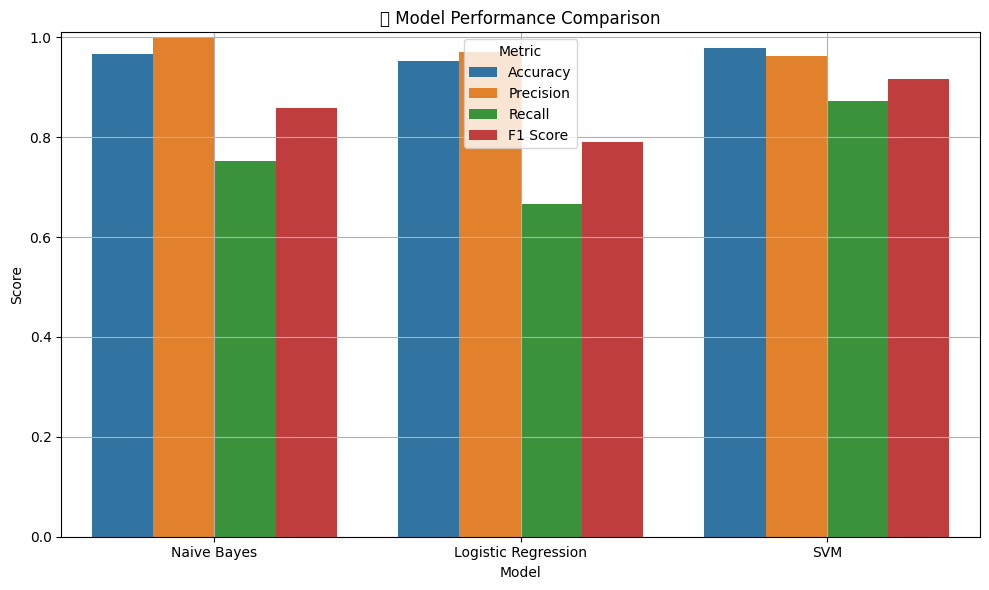

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# ✅ Step: Evaluate all models and store metrics safely
results = {}

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, zero_division=0),
        "Recall": recall_score(y_test, preds, zero_division=0),
        "F1 Score": f1_score(y_test, preds, zero_division=0)
    }

# ✅ Convert results to DataFrame
results_df = pd.DataFrame(results).T

# ✅ Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.reset_index().melt(id_vars='index'),
            x='index', y='value', hue='variable')
plt.title("📊 Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0.0, 1.01)
plt.legend(title='Metric')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
import joblib
from google.colab import files

# Save model and vectorizer (you can change the model used if needed)
joblib.dump(MultinomialNB().fit(X_train_tfidf, y_train), 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Download the files to your local machine
files.download('spam_classifier_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>